# 21 Εισαγωγή στην μηχανική μάθηση και μερικές εφαρμογές ταξινόμησης (λύσεις)

<div class="alert alert-block alert-info" style="margin-top: 20px">


<b>ΣΥΝΟΠΤΙΚΑ</b>

Σε αυτό to σημειωματάριο κάνουμε μια εισαγωγή στην ταξινόμηση και μαθαίνουμε πως "χτίζουμε" ένα μοντέλο. Θα δούμε την όλη διαδικασία μέσα από ένα παράδειγμα και εκτελώντας / συζητώντας τα ενδιάμεσα βήματα:
    
- προετοιμασία/προεπεξεργασία δεδομένων
- οπτικοποίηση δεδομένων
- επιλογή χαρακτηριστικών
- βασική εφαρμογή αλγορίθμων    
- παρουσίαση μετρικών απόδοσης
- δυαδικό και πολύ-κλασικό πρόβλημα
    
$\rightarrow$ Ο στόχος είναι να έχετε ένα πρακτικό παράδειγμα εφαρμογής ενός αλγορίθμου για να <u>κατανοήσετε την προσέγγιση</u> και να χτίσετε πάνω σε αυτό για τις δικές σας εφαρμογές.
</div>

- - - 

## 21.1 Γενικά 

Η ταξινόμηση αποτελεί μια από τις κύριες κατηγορίες προβλημάτων για τις οποίες χρησιμοποιείται η μηχανική μάθηση. Στόχος είναι να αυτοματοποιήσουμε την ομαδοποίηση αντικειμένων σε διακριτές κατηγορίες ή "κλάσεις", με βάση τις ιδιότητες ή τα χαρακτηριστικά τους. 

### 21.1.1 Τύποι ταξινόμησης

Υπάρχουν δύο βασικές προσεγγίσεις:

- Η **μη επιβλεπόμενη (unsupervised)**, όπου δεν παρέχονται ετικέτες κατά τη διάρκεια της διαδικασίας εκπαίδευσης και η μηχανή μαθαίνει τον ορισμό κάθε κατηγορίας από τα δεδομένα (όπως είδαμε στην ομαδοποίηση στο προηγούμενο μάθημα).

> Στην πράξη, η μηχανή μαθαίνει να ομαδοποιεί αντικείμενα με παρόμοιες ιδιότητες.

- H **επιβλεπόμενη (supervised)** στην οποία παρέχονται ετικέτες για κάθε αντικείμενο στο σύνολο εκπαίδευσης. Σε αυτήν την περίπτωση, η ιδέα είναι ότι μπορούμε να εκπαιδεύσουμε το μοντέλο να συσχετίζει την ετικέτα με ορισμένα χαρακτηριστικά των δεδομένων εκπαίδευσης.

> Στην πράξη, η μηχανή μαθαίνει να βρίσκει ομοιότητες μεταξύ αντικειμένων με την ίδια ετικέτα.

### 21.1.2 Ορολογία

- Οι όροι **κλάση (class)** ή **ετικέτα (label)** είναι το ίδιο και χρησιμοποιούνται εναλλάξιμα.

- Τα **δείγματα/αντικείμενα (samples)** μπορούν να είναι οποιουδήποτε αυθαίρετου τύπου (π.χ. μια συμβολοσειρά - string, μια εικόνα ή αριθμοί).

- Τα δείγματα/αντικείμενα κατηγοριοποιούνται βάσει των **ιδιοτήτων ή χαρακτηριστικών (features)** τους (τις πραγματικές πληροφορίες που περνάμε στη μηχανή, π.χ. οι εντάσεις των pixel στην περίπτωση μιας εικόνας).


## 21.2 Προεπισκόπηση και προεπεξεργασία δεδομένων

Όπως είδαμε και στο προηγούμενο μάθημα μια σημαντική αρχή της μηχανικής μάθησης είναι η "σκουπίδια μέσα, σκουπίδια έξω" (garbage in, garbage out). Οπότε είναι εξαιρετικά σημαντικό (ίσως και το _σημαντικότερο_ βήμα) όταν χτίζουμε την απάντηση στο πρόβλημα που θέλουμε να αντιμετωπίσουμε να δούμε αναλυτικά _τι είναι_ τα δεδομένα μας και _πως_ να τα χρησιμοποιήσουμε. 

### 21.2.1 Περιγραφή προβλήματος

Για να ταξινομήσουμε σωστά ένα άστρο, χρειαζόμαστε ένα φάσμα του. Το να πάρουμε ένα φάσμα είναι σχετικά χρονοβόρο, ενώ αν έχουμε αρκετές εκατοντάδες στόχων γίνεται σχεδόν ανέφικτο (με διάφορες τεχνικές μπορούμε να πάρουμε μέχρι και μερικές δεκάδες φάσματα - multi-object spectroscopy). Αντίθετα, το να πάρουμε εικόνες από τους ίδιους στόχους είναι πολύ πιο εύκολο, γρήγορο, ενώ μπορεί να καλύψει ταυτόχρονα περισσότερους στόχους (μεγαλύτερο πεδίο παρατήρησης). Η φωτομετρία λοιπόν, σε διαφορετικά φίλτρα, μπορεί να μας δώσει ένα πολύ χαμηλής ανάλυσης "φάσμα", οπότε και να έχουμε μια ιδέα για το πως να ταξινομήσουμε το άστρο.

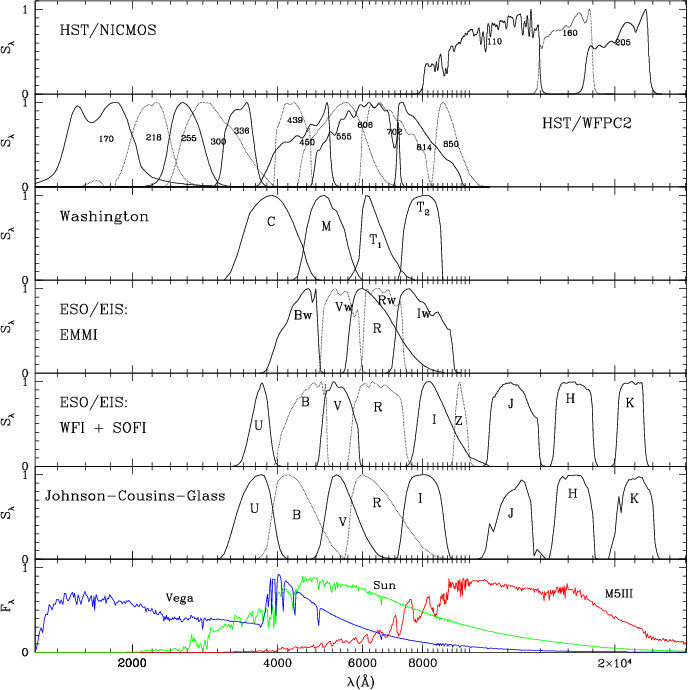
<center>Εικόνα 21.1 Καμπύλες απόκρισης για διαφορετικά συστήματα φίλτρων μαζί με κάποια ενδεικτικά φάσματα άστρων, όπως του Βέγα, του Ήλιου, και ενός Μ5 γίγαντα (εικ. από το <a href="https://ui.adsabs.harvard.edu/abs/2002A%26A...391..195G/abstract" target="_blank" rel="noopener noreferrer">Girardi et al. (2002)</a>).<center><br>
    

Σε αυτό το παράδειγμα αυτό που θέλουμε να κάνουμε είναι να χρησιμοποιήσουμε ένα σύνολο φωτομετρικών μετρήσεων (από το οπτικό έως μέσο υπέρυθρο) για ένα δείγμα εξελιγμένων άστρων μεγάλης μάζας στο Μεγάλο Μαγκελανικό/Γαλαξιακό Νέφος (με δεδομένα από αυτές τις εργασίες: [Bonanos et al. (2009) AJ, 138, 1003](https://ui.adsabs.harvard.edu/abs/2009AJ....138.1003B/abstract), [Neugent et al. (2012), ApJ, 749, 177](https://ui.adsabs.harvard.edu/abs/2012ApJ...749..177N/abstract), and [Davies, Crowther & Beasor (2018), MNRAS, 478, 313](https://ui.adsabs.harvard.edu/abs/2018MNRAS.478.3138D/abstract)).

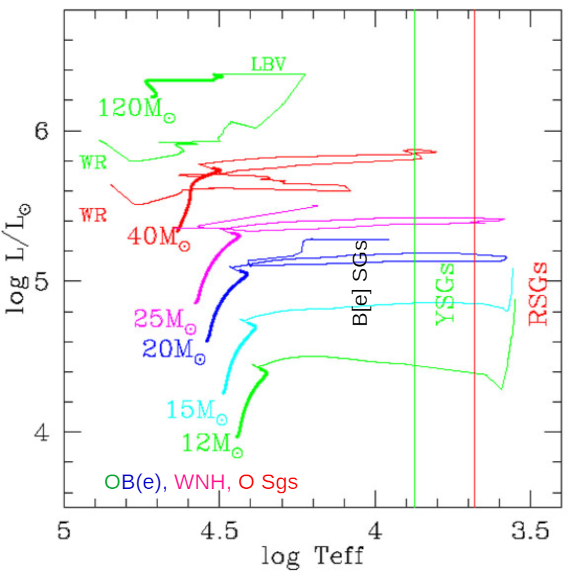

<center>Εικόνα 21.2 Μια εικόνα ενός διαγράμματος <a href="https://el.wikipedia.org/wiki/%CE%94%CE%B9%CE%AC%CE%B3%CF%81%CE%B1%CE%BC%CE%BC%CE%B1_%CE%A7%CE%AD%CF%81%CF%84%CE%B6%CF%83%CF%80%CF%81%CE%BF%CF%85%CE%BD%CE%B3%CE%BA-%CE%A1%CE%AC%CF%83%CE%B5%CE%BB"  target="_blank" rel="noopener noreferrer">Hertzsprung–Russell</a> το οποίο δείχνει πως εξελίσσονται τα άστρα μεγάλης μάζας περνώντας από διαφορετικές φάσεις κατά την διάρκεια της ζωής τους και πριν εκραγούν σαν υπερκαινοφανείς (supernovae). (ελαφρά διαμορφωμένη εικόνα από την εικ. 1 του <a href="https://ui.adsabs.harvard.edu/abs/2013NewAR..57...14M/abstract" target="_blank" rel="noopener noreferrer"> Massey et al. (2013)</a>).</center><br>


Ο στόχος μας είναι να χρησιμοποιήσουμε μια μέθοδο που θα μας βοηθήσει να **διακρίνουμε διαφορετικές κατηγορίες αντικειμένων**. Για τους σκοπούς μας θα χρησιμοποιήσουμε αστέρια OBA (αντικείμενα κύριας ακολουθίας), OBAe (υποκατηγορία των αστεριών OBA με δίσκους και εκπομπές γραμμών), αστέρια Wolf-Rayet (ζεστοί εξελιγμένοι αστέρες με ισχυρούς αστρικούς ανέμους που έχουν χάσει το περίβλημά τους), Κίτρινους και Κόκκινους υπεργιγάντες (εξελιγμένα άστρα). Για την ευκολία μας θα χρησιμοποιήσουμε τις ετικέτες OBA, OBAe, WR, YSG και RSG αντίστοιχα.

★ Μια παρόμοια, αλλά πιο λεπτομερής, υλοποίηση πραγματοποιείται στο [Maravelias et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022A%26A...666A.122M/abstract).

### 21.2.2 Άνοιγμα αρχείου και εξέταση δεδομένων

_Σημείωση: όπως έχουμε δει υπάρχουν διάφοροι τρόποι για να ανοίξουμε και να επεξεργαστούμε δεδομένα. Στη συγκεκριμένη περίπτωση το παράδειγμα έχει στηθεί με την χρήση της `NumPy` μόνο, ενώ θα μπορούσαμε να το κάνουμε και με `pandas`._  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dfile = "data_files/LMC_phot_data.csv"
miss_value = -999.0  # when entries are missing

data = np.genfromtxt(dfile, dtype=None, encoding='utf8', 
                     comments='#', delimiter=',', 
                     filling_values = miss_value, 
                     names=True, autostrip='Yes')

#examine data
print("Let us see what we have:\n")
print("The column names:")
print(data.dtype.names)
print("-"*25)
print("Let's print the spectral types only:")
print(data['SpT'])
print("-"*25)

Let us see what we have:

The column names:
('Name', 'RAJ2000', 'DEJ2000', 'U', 'e_U', 'B', 'e_B', 'V', 'e_V', 'I', 'e_I', 'J', 'e_J', 'H', 'e_H', 'K', 'e_K', '36', 'e_36', '45', 'e_45', '58', 'e_58', '80', 'e_80', '24', 'e_24', 'SpT')
-------------------------
Let's print the spectral types only:
['WR' 'OBAe' 'OBA' ... 'YSG' 'YSG' 'YSG']
-------------------------


Από τις στήλες βλέπουμε ότι το κάθε αντικείμενο (γραμμή) έχεις τις εξής παραμέτρους: 

- Όνομα (Name)
- Συντεταγμένες (RAJ2000, DEJ2000)
- Φωτομετρικές μετρήσεις σε διαφορετικά φίλτρα (U, e_U, B, e_B, ..., e_24 - όπου το πρόθεμα e_ αντιστοιχεί στο σφάλμα της μέτρησης). Τα 36, 45, 58, 89, 24 αντιστοιχούν στα φίλτρα των  3.6μm, 4.5μm, 5.8μm, 8.9μm, 24μm bands του *Spitzer*, που χρησιμοποιούνται για ευκολία αναπαράστασης.
- Φασμαστικό τύπο (SpT) που αντιστοιχεί στην κατηγορία (κλάση) που ανήκει το κάθε αντικείμενο.

Θέλουμε να ομαδοποιήσουμε τώρα όλα αυτά τα αντικείμενα με βάση την κλάση τους. Επειδή δουλεύουμε με το `NumPy` και τους δομημένους πίνακες (structured arrays) θα επιλέξουμε αντικείμενα με βάση τον δείκτη τους στο αρχείο (indeX).

In [2]:
from collections import defaultdict

classes = defaultdict(list)

for i in range(0,len(data['SpT'])): 
#    print(i, data['SpT'][i])
    classes[data['SpT'][i]].append(i)

#print(classes)
unique_cls = sorted(set(classes.keys()))
print(unique_cls)
print("> SUMMARY of loaded data:")
print("=========================")
for sptype in unique_cls:
    number = len(classes[sptype])
    print(f"{sptype:-<6s}--> {number:>3} stars")

['OBA', 'OBAe', 'RSG', 'WR', 'YSG']
> SUMMARY of loaded data:
OBA-----> 370 stars
OBAe---->  73 stars
RSG-----> 297 stars
WR------>  91 stars
YSG-----> 208 stars


&#9755; Προσέξτε ότι δεν έχουν όλες οι κλάσεις τον ίδιο αριθμό αντικειμένων!

In [3]:
bands = [b for b in data.dtype.names[3:-1] if 'e_' not in b]

def reminder():
    """ 
    A simple function to print all bands
    and classes available.
    """
    print('Available bands to use: ')
    print(','.join(bands))
    print('-'*25)
    print('Available classes to use:')
    print(','.join(unique_cls))

In [4]:
from astropy.table import Table, Column

print(f'Available photometry for: {", ".join(bands)}')     

# Constructing the table for the statistics 
phot_data_col_names = ['Class', 'All'] + [bb for bb in bands]
phot_data_per = Table( names = phot_data_col_names, dtype = ['S3']+['i4']+['f2']*(len(bands)))

for spt in unique_cls:
    indcs = classes[spt]
    starsWbands = defaultdict(list) # keep those with measurements across all
    for star in indcs:
#        print(spt, star)
        for bnd in bands:
            mag = data[star][bnd]
#            print(mag)
            if mag!=miss_value:
                starsWbands[bnd].append(star)    
    row_data_per = [spt, len(indcs)] + [(len(starsWbands[bb])/len(indcs))*100 for bb in bands]
    phot_data_per.add_row ( row_data_per )
    
print("\nNumber of stars per band (in %)\n")
phot_data_per    

Available photometry for: U, B, V, I, J, H, K, 36, 45, 58, 80, 24

Number of stars per band (in %)



Class,All,U,B,V,I,J,H,K,36,45,58,80,24
bytes4,int32,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16
OBA,370,77.3,78.94,78.94,73.5,96.5,97.56,97.0,99.2,97.8,93.5,60.28,2.703
OBAe,73,94.5,94.5,94.5,91.75,94.5,95.9,91.75,98.6,98.6,80.8,61.66,19.17
RSG,297,88.2,99.3,99.3,95.94,100.0,99.7,100.0,98.6,98.3,98.3,99.0,99.3
WR,91,85.7,87.94,87.94,83.5,91.2,93.44,90.1,97.8,98.9,94.5,72.5,4.395
YSG,208,95.7,100.0,100.0,85.56,100.0,100.0,100.0,100.0,100.0,100.0,95.7,100.0


<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 21.1</b>

Τι παρατηρείτε στον παραπάνω πίνακα;   

##### Απάντηση

Πολλές πηγές έρχονται χωρίς μετρήσεις σε όλα τα φίλτρα. Αυτό αποτελεί ένα πρόβλημα για αλγόριθμους που χρειάζονται τιμές για να λειτουργήσουν.

Αυτό το πρόβλημα των <b>"ελλείπουσων τιμών" (missing values)</b> είναι πράγματι o κανόνας παρά η εξαίρεση. Υπάρχουν τρόποι για να αντιμετωπιστεί αυτό, για παράδειγμα, παίρνοντας τις μέσες τιμές των αντίστοιχων φίλτρων ή πιο λεπτομερείς τεχνικές. Ελέγξτε το <a href="https://scikit-learn.org/stable/modules/impute.html" target="_blank" rel="noopener noreferrer">εγχειρίδιο του scikit-learn για περισσότερες λεπτομέρειες</a>.

### 21.2.3 Οπτικοποίηση δεδομένων - επιλογή χαρακτηριστικών

Είπαμε ότι ένα κρίσιμο βήμα για την σωστή λειτουργία κάθε αλγορίθμου είναι ο εντοπισμός των κατάλληλων χαρακτηριστικών (features). 

> Tα χαρακτηριστικά είναι μετρήσιμες ιδιότητες ή/και κατηγορικά δεδομένα που χρησιμοποιούμε για να περιγράψουμε ή να διακρίνουμε/κατηγοριοποιήσουμε διαφορετικά αντικείμενα ή φαινόμενα.

Στην φυσική, τα χαρακτηριστικά μπορούν να αντιστοιχούν σε φυσικές ποσότητες ή παραγόμενες παραμέτρους που είναι σχετικές με το συγκεκριμένο πρόβλημα. Για παράδειγμα, στην πυρηνική φυσική, τα χαρακτηριστικά μπορεί να αντιστοιχούν σε ιδιότητες των αλληλεπιδράσεων των σωματιδίων, όπως η ενέργεια απορρόφησης σε έναν ανιχνευτή ή ο αριθμός των φορτισμένων σωματιδίων που παράγονται. Στην αστρονομία θα μπορούσαν να είναι πληροφορίες σχετικά με το την θερμοκρασία, το χρώμα, την απόσταση, και τον φασματικό τύπο κάποιων άστρων. προσέξτε ότι το τελεταίο δεν είναι ένας αριθμός αλλά μια κατηγοριοποίηση (π.χ. Μ5, Ο2). 

Ένα από τα κύρια προβλήματα στη μηχανική μάθηση είναι η επιλογή των κατάλληλων χαρακτηριστικών που αποτυπώνουν τις ουσιαστικές πληροφορίες που απαιτούνται για την επίλυση του συγκεκριμένου προβλήματος. Αυτή η διαδικασία συχνά απαιτεί γνώσεις του πεδίου και πειραματισμό για να καθοριστούν ποια χαρακτηριστικά είναι πλέον ενημερωτικά και σχετικά για την επίλυση του προβλήματος.

Οπότε ας δούμε πως αυτό μπορεί να γίνει στη συγκεκριμένη εφαρμογή. Η συνάρτηση `reminder()` μας υπενθυμίζει τα φίλτρα (δεδομένα) και τις κλάσεις των αντικειμένων που έχουμε διαθέσιμα. 

In [5]:
def selmags( band1, band2, cls):
    """
    Function to select sources of a specific
    spectral class (cls) and return the magnitudes
    that correspond to bands 1 and 2.
        """
    # all indeces of the particular class
    cls_indcs = np.asarray( classes[cls] ) 
    # selecting those indeces of the class
    # that do not contain missing values, ie -999
    sel_cls_indcs = np.where( (data[band1][cls_indcs]!=miss_value)
                        & (data[band2][cls_indcs]!=miss_value) )[0]

    sel_indcs = cls_indcs[sel_cls_indcs]
    rem_indcs = len(cls_indcs)-len(sel_indcs)
    print(f'-- {cls}: excluding {rem_indcs} out of {len(cls_indcs)} sources ({rem_indcs/len(cls_indcs)*100:.1f}%)')
    mag1, mag2 = data[band1][sel_indcs], data[band2][sel_indcs]    
    
    return mag1, mag2

- plot1:
-- RSG: excluding 2 out of 297 sources (0.7%)
-- OBA: excluding 88 out of 370 sources (23.8%)

- plot2:
-- RSG: excluding 5 out of 297 sources (1.7%)
-- OBA: excluding 18 out of 370 sources (4.9%)


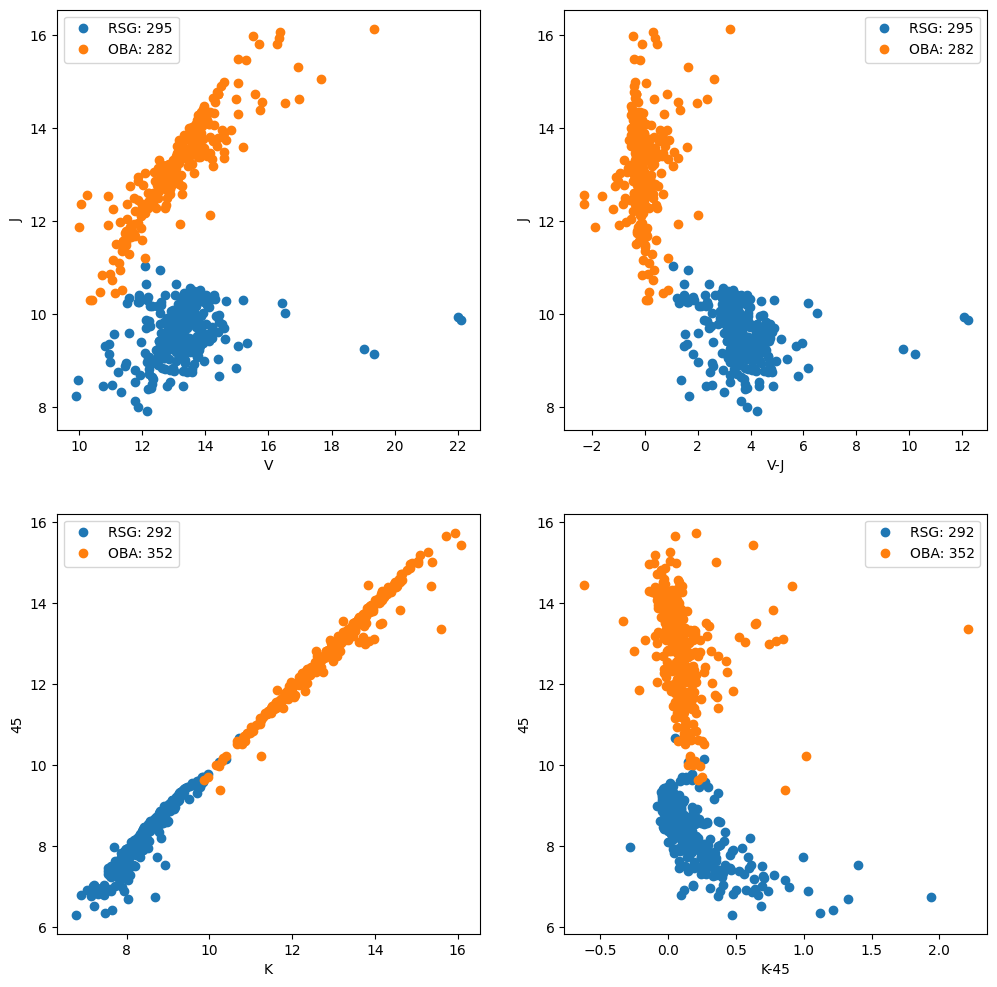

In [6]:
fig, ax = plt.subplots(2,2, figsize=(12, 12))

#selected_spt = unique_cls              # if you want to print all

# Available classes to use:
# OBA,OBAe,RSG,WR,YSG
selected_spt = ['RSG', 'OBA'] #, 'WR']     # put your selection here

# Available bands to use: 
# U,B,V,I,J,H,K,36,45,58,80,24

# plot 1
band1_1 = 'V'
band1_2 = 'J'

# plot 2
band2_1 = 'K'
band2_2 = '45'

print('- plot1:')
for s in selected_spt: 
    plt1 = selmags( band1_1, band1_2, s)

    ax[0,0].plot(plt1[0], plt1[1], 'o', label=f'{s}: {len(plt1[0])}')
    ax[0,0].set_xlabel(f'{band1_1}') #'-{band1_2}')
    ax[0,0].set_ylabel(band1_2)
    ax[0,0].invert_yaxis()
    ax[0,0].invert_xaxis()
    ax[0,0].legend()

    ax[0,1].plot(plt1[0]-plt1[1], plt1[1], 'o', label=f'{s}: {len(plt1[0])}')
    ax[0,1].set_xlabel(f'{band1_1}-{band1_2}')
    ax[0,1].set_ylabel(band1_2)
    ax[0,1].invert_yaxis()
    ax[0,1].legend()
    
    
print()
print('- plot2:')        
for s in selected_spt:
    plt2 = selmags( band2_1, band2_2, s)
    ax[1,0].plot(plt2[0], plt2[1], 'o', label=f'{s}: {len(plt2[0])}')
    ax[1,0].set_xlabel(f'{band2_1}') #'-{band2_2}')
    ax[1,0].set_ylabel(band2_2)
    ax[1,0].invert_yaxis()
    ax[1,0].invert_xaxis()    
    ax[1,0].legend()
    
    ax[1,1].plot(plt2[0]-plt2[1], plt2[1], 'o', label=f'{s}: {len(plt2[0])}')
    ax[1,1].set_xlabel(f'{band2_1}-{band2_2}')
    ax[1,1].set_ylabel(band2_2)
    ax[1,1].invert_yaxis()
    ax[1,1].legend()
    

plt.show()

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 21.2</b>

Επιστρέψτε στο προηγούμενο κελί (με τα διαγράμματα) και αλλάξτε τα φίλτρα καθώς και τις κλάσεις που θέλετε να συμπεριλάβετε (μέσω του `selected_spt`) και απαντήστε στις ακόλουθες ερωτήσεις:

A. Βρείτε ένα συνδυασμό δύο κλάσεων και φίλτρων που διαχωρίζονται καλά τα αντικείμενα μεταξύ τους. 
    
Β. Τι συμβαίνει όταν αρχίσετε να αυξάνετε τον αριθμό των κλάσεων που συμπεριλαμβάνετε;
    
Γ. Πως η επιλογή των φίλτρων επηρεάζει τα αντικείμενα που κρατάτε;
    
Δ. Θα προτιμούσατε να χρησιμοποιήσετε συνδυασμούς φίλτρων με περισσότερα ή λιγότερα αντικείμενα;    

##### Απάντηση

Α. Ένας συνδυασμός που δουλεύει καλά είναι για τις κλάσεις 'RSG' και 'OBA', χρησιμοποιώντας τα φίλτρα 'V' και 'J', 'K' και 45'.

Β. Προσθέτοντας κλάσεις το πρόβλημα γίνεται πιο σύνθετο. Αντικείμενα από διαφορετικές κλάσεις αρχίζουν και αλληλεπικαλύπτονται με αποτέλεσμα ο διαχωρισμός τους να είναι πιο δύσκολος. 

Επίσης υπάρχουν συνδυασμοί φίλτρων που διαχωρίζουν καλύτερα κάποιες κλάσεις αλλά δεν υπάρχει απόλυτα ένας συνδυασμός που να δουλεύει τέλεια για όλες τις κλάσεις.

Γ. Για να κάνουμε τα διαγράμματα αυτά θα πρέπει τα αντικείμενα μας να έχουν μετρήσεις σε όλα τα φίλτρα που επιλέγουμε (έτσι ώστε να μπορεί να αναπαρασταθεί το σημείο). Έτσι ουσιαστικά εξαιρούμε αντικείμενα που δεν έχουν μετρήσεις σε κάποια από αυτές (πρόβλημα "ελλειπουσών τιμών"). Αυτό σημαίνει ότι όταν εξαιρούνται πολλά αντικείμενα μειώνονται (αισθητά σε κάποιες περιπτώσεις) τα διαθέσιμα αντικείμενα/δείγματα. 

Δ. Προφανώς θα θέλαμε να χρησιμοποιήσουμε όλες τις διαθέσιμες πληροφορίες από όλες τις πηγές, έτσι ώστε ο αλγόριθμος να "μάθει" καλύτερα τις ιδιότητες κάθε κατηγορίας. Αφού αυτό δεν είναι εφικτό τότε προσπαθούμε να μεγιστοποιήσουμε τον αριθμό των πηγών που χρησιμοποιούνται για να υπάρχει καλύτερος προσδορισμός του χώρου των παραμέτρων που εξετάζεται.  Σε προβλήματα με ήδη μικρούς αριθμούς (όπως σε αυτό το παράδειγμα) αυτό γίνεται ακόμη πιο κρίσιμο (διότι όταν παραλείπουμε αντικείμενα, αφαιρούμε πληροφορία).

## 21.3 Προετοιμασία δεδομένων για εκπαίδευση

Στις επιβλεπόμενες προσεγγίσεις θέλουμε πρώτα να εκπαιδεύσουμε τους αλγορίθμους αυτό που χρειάζεται να μάθουν (τις σχέσεις / ομοιότητες των χαρακτηριστών μεταξύ των μελών μιας κλάσης ώστε να τις διαχωρίζουν από τις υπόλοιπες). Έχοντας πετύχει αυτό τότε μπορούν να προχωρούν σε προβλέψεις δηλαδή να τους δώσουμε δεδομένα που δεν έχουν ξαναδεί και να επιστρέφουν την κλάση τους. 

Ωστόσο, υπάρχει ένα πρόβλημα. Έχουμε ήδη ένα σετ δεδομένων το οποίο θα θέλαμε να χρησιμοποιήσουμε για την εκπαίδευση, αλλά δεν έχουμε τρόπο να ελέγξουμε πόσο ικανοποιητικά είναι τα αποτελέσματα. Αν δώσουμε όλα τα δεδομένα τότε ο αλγόριθμος "θα τα μάθει απ' έξω" και θα προσαρμοστεί τέλεια σε αυτά (κάτι που ονομάζται **"υπερπροσαρμογή" - overfitting**). Έτσι όταν εμφανιστούν νέα δεδομένα (αντικείμενα)  πιθανότατα θα τα ταξινομήσει εσφαλμένα.

Τι μπορούμε να κάνουμε για να το αποφύγουμε; 

Θα πρέπει να **χωρίσουμε τα δεδομένα** και να ακολουθήσουμε τον **Χρυσό Κανόνα**.

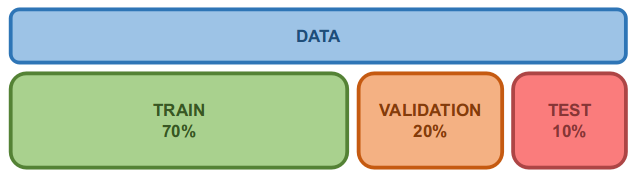
<center>Εικόνα 21.3 Ενδεικτικός τρόπος χωρισμού δεδομένων σε δείγματα εκπαίδευσης (training), επικύρωσης (validation), και δοκιμής (test). Για πολύ μεγάλα σετ δεδομένων (πχ πάνω από $10^5$ αντικείμενα) τα ποσοστά των σετ επικύρωσης και δοκιμής μπορεί να είναι σημαντικά μικρότερα.</center>

Τι είναι αυτά τα διαφορετικά σετ;

- **Εκπαίδευσης** $\rightarrow$ **Μαθαίνει** τις παραμέτρους του μοντέλου

- **Επικύρωσης** $\rightarrow$ Ελέγχει ότι το εκπαιδευμένο μοντέλο δεν **υπερπροσαρμόζει/υποπροσαρμόζει (overfitting/underfitting)** το σετ εκπαίδευσης

- **Δοκιμής** $~~~~~~~\rightarrow$ **Εκτιμά** την απόδοση του μοντέλου.

##### Χρυσός Κανόνας

> Αντιμετωπίστε τα δεδομένα (σετ) δοκιμής σαν να έρχονται από το μέλλον.






Ας δούμε πως αυτό μπορεί να γίνει για το πρόβλημά μας. 

Θα ξεκινήσουμε κάνοντας πρώτα το εξής βήμα. Θα θεωρήσουμε ότι το πρόβλημα μας είναι δυαδικό οπότε και καλούμαστε να διαχωρίζουμε μια κλάση από την άλλη. Αυτό μπορεί να γίνει είτε για μια κλάση μόνο (π.χ. RSG) ή συνδυασμό κάποιων (π.χ. OBA, WR) και θα αποτελεί την κλάση "επιλογής" (SELected). Όλες οι κλάσεις που περισσεύουν αποτελούν μια δεύτερη κλάση που περιέχει τις "προσμείξεις" (CONtaminant).   

In [7]:
def process_data( bands2use, binary_classes2use  ):
    """
    Process input data to return arrays 
    of magnitudes and (consecutive) colors
    based on the input bands (band2use).

    Option to prepare data for binary classification
    if binary_classes2use contains classes or not.
    
    """
    pd_ml_data_mags = []   # working with magnitudes directly
    pd_ml_data_clrs = []   # taking color terms, i.e. mag1-mag2
    pd_ml_labels    = []
    pd_ml_objects   = []

    print(f'# stars with mags in: {",".join([bb for bb in bands2use])}')
    print("=========================")
    print("Type    initial    final ")
    print("-------------------------")
    init = 0 # initial total number of stars (added after each iteration)

    for sptype in unique_cls:
        indcs = classes[sptype]
        kept = []
        init += len(indcs)
        for star in indcs:
            mag_list = list(data[star][bands2use])
            # rejecting stars with missing values
            if miss_value in mag_list:
                #print('REJECTING!!! <',data[star])
                continue
            else:
                # creting the magnitude list
                mag = [ i for i in mag_list ] #data[star][bands_selected] ]

                # creating the color term (index)
                clr = [mag[i]-mag[i+1] for i in range(len(mag)-1)]

                pd_ml_data_clrs.append(clr)
                pd_ml_data_mags.append(mag)
                pd_ml_objects.append(data[star]['Name'])
                kept.append(sptype)           

                # selecting class(es) to examine for binary classifier
                if len(binary_classes2use)!=0:
                    if sptype in binary_classes2use:
        #                print(f'. keeping {sptype}')
                        label_sptype = 'SEL'
                    else: 
        #                print(f'. not considering {sptype}')
                        label_sptype = 'CON'
                    pd_ml_labels.append(label_sptype)
                else:
                    pd_ml_labels.append(sptype)

        print(f'{sptype:<4}  {len(indcs):>9} {len(kept):>8}')
    print('-'*24)
    print(f'TOTAL:  {init:>7}  {len(pd_ml_data_mags):>7}') 
    if len(binary_classes2use)!=0:
        print('='*24)
        print(f'classifying:  {len(pd_ml_labels)-pd_ml_labels.count("CON"):>10}') 
        print(f'contaminants:  {pd_ml_labels.count("CON"):>9}') 


    pd_ml_data_mags = np.asarray(pd_ml_data_mags)
    pd_ml_data_clrs = np.asarray(pd_ml_data_clrs)
    pd_ml_objects   = np.asarray(pd_ml_objects)
    pd_ml_labels    = np.asarray(pd_ml_labels)
          
    return pd_ml_data_mags, pd_ml_data_clrs, pd_ml_objects, pd_ml_labels

In [8]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


Στην παρούσα περίπτωση επιλέγουμε σαν κλάση που θέλουμε να διαχωρίσουμε (από όλες τις άλλες) αυτή των κόκκινων υπεργιγάντων (RSG). Επιλέγουμε να κρατήσουμε τα φίλτρα 'V', 'J', '45'.

In [9]:
class2keep = ['RSG']
# Select the bands you want to use here:
bands_selected = ['V', 'J', '45'] 

In [10]:
ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected, class2keep)  

# stars with mags in: V,J,45
Type    initial    final 
-------------------------
OBA         370      276
OBAe         73       65
RSG         297      291
WR           91       76
YSG         208      208
------------------------
TOTAL:     1039      916
classifying:         291
contaminants:        625


Η συνάρτηση `process_data( bands2use, binary_classes2use)` επεξεργάζεται τα αρχικά δεδομένα με βάση τις προηγούμενες επιλογές και επιστρέφει τέσσερεις πίνακες που περιέχουν: 

- ml_data_mags: τα νούμερα που αντιστοιχούν στις μετρήσεις των φίλτρων αυτών 
- ml_data_clrs: τα 'χρώματα', δηλαδή τις διαφορές τους (π.χ. 'V-J','J-45') 
- ml_objects: τα ονόματα (IDs) των αντικειμένων 
- ml_labels: την κλάση τους που στη συγκεκριμένη περίπτωση θα είναι είτε 'SEL' αν η αρχική κλάση ήταν RSG ή 'CON' αν ήταν οποιαδήποτε άλλη.   

_Σημείωση: η συνάρτηση κρατάει μόνο τα αντικείμενα για τα οποία έχουμε μετρήσεις σε όλα τα ζητούμετα φίλτρα (εδώ 'V','J','45') αλλιώς τα αφαιρεί._ 

Ας δούμε πως φαίνονται οι ετικέτες:

In [11]:
print(ml_labels)

['CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'C

Και ας κάνουμε ένα διάγραμμα (τυπώνει μόνο τα δύο πρώτα φίλτρα από αυτά που έχουν επιλεγεί) για να δούμε πως φαίνονται οι δύο κλάσεις. 

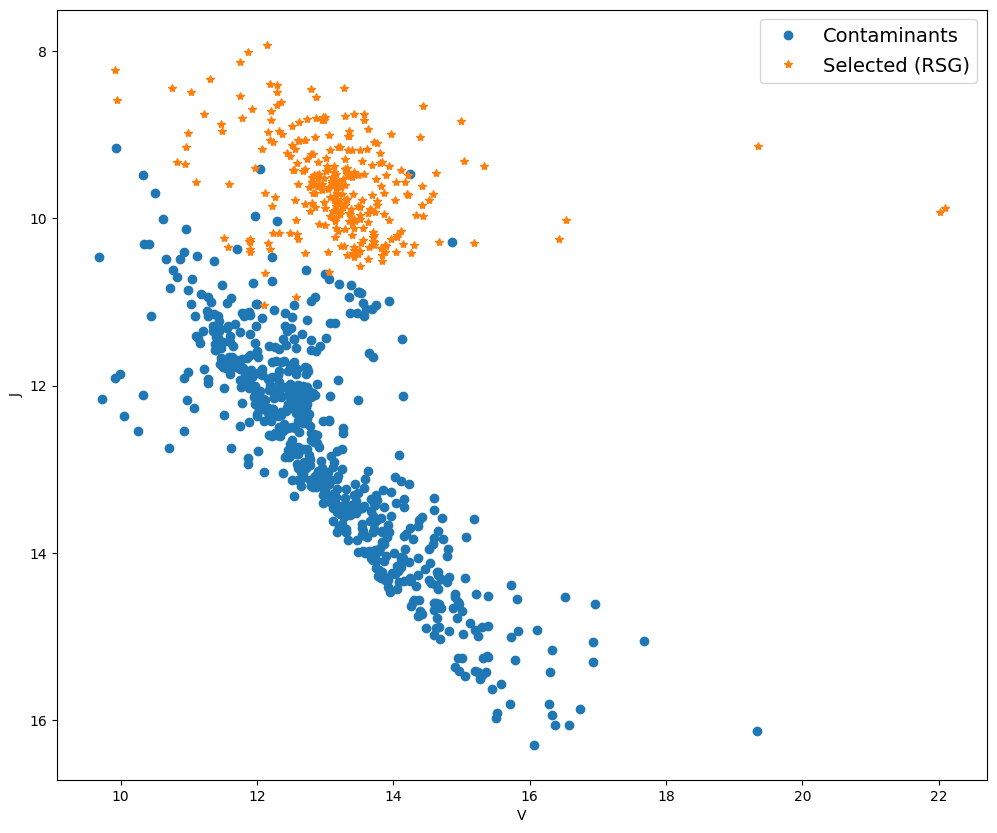

In [12]:
fig = plt.figure(figsize=(12,10))

conts = np.where( ml_labels=='CON' )[0]
clasf = np.where( ml_labels!='CON' )[0]

plt.plot( ml_data_mags[conts][:,0], ml_data_mags[conts][:,1], 'o', 
             label='Contaminants')
plt.plot( ml_data_mags[clasf][:,0], ml_data_mags[clasf][:,1], '*', 
             label=f'Selected ({"+".join(class2keep)})')
plt.gca().invert_yaxis()

plt.xlabel(f'{bands_selected[0]}') #'-{bands_selected[1]}')
plt.ylabel(bands_selected[1])
plt.legend(fontsize=14)
plt.show()


_Σημείωση: βλέπουμε ότι γενικά μπορούν να διαχωριστούν πολύ καλά αυτές οι δύο κλάσεις - δηλαδή τα RSG σε σχέση με όλες τις άλλες κλάσεις._


Ας εφαρμόσουμε τον διαχωρισμό δειγμάτων σε αυτό το σετ δεδομένων. Θα χρησιμοποιήσουμε μόνο τα σετ εκπαίδευσης/δοκιμής, καθώς το σετ επικύρωσης έχει να κάνει και με τον προσδιορισμό των υπερπαραμέτρων του μοντέλου και ξεφεύγει από τον σκοπό αυτού του μαθήματος.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ml_data_mags, 
                                                    ml_labels, 
                        test_size=0.3) #, random_state=42) 

print(f'- From {len(ml_objects)} sources:')
print(f'   {len(X_train)} (training)')
print(f'   {len(X_test)} (test)') 
print()
print(f'Test labels: {y_test}')


- From 916 sources:
   641 (training)
   275 (test)

Test labels: ['CON' 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'SEL' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'SEL' 'CON'
 'CON' 'CON' 'SEL' 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL'
 'CON' 'CON' 'CON' 'SEL' 'CON' 'SEL' 'SEL' 'SEL' 'CON' 'SEL' 'CON' 'CON'
 'CON' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'SEL' 'SEL' 'CON' 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'CON' 'SEL' 'SEL' 'SEL'
 'CON' 'CON' 'SEL' 'SEL' 'CON' 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON' 'SEL'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'SEL' 'SEL' 'CON' 'CON' 'SEL'
 'SEL' 'CON' 'SEL' 'CON' 'CON' 'SEL' 'CON' 'SEL' 'CON' 'CON' 'SEL' 'CON'
 'CON' 'SEL' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'SE

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 21.3</b>

Ξανατρέξετε το παραπάνω κελό (Ctl+Enter) - τι παρατηρείτε; Υπάρχει τρόπος να το διορθώσουμε; 

##### Απάντηση

Ο διαχωρισμός είναι μια τυχαία διαδικασία, δηλαδή κάθε φορά που εκτελείται διαφορετικά αντικείμενα θα μπουν στο ένα σετ και στο άλλο. 

Μπορούμε να χρησιμοποιήσουμε το `random_state` (ίσο με κάποιο νούμερο, πχ 42 !) για να έχουμε πάντα τα ίδια αντικείμενα στα ίδια σετ. Αυτό επιτρέπει στο να πραγματοποιούνται τεστ και να είναι συγκρίσιμα τα αποτλέσματά τους. 

## 21.4 Επιλογή αλγορίθμου

_Τι έχουμε πετύχει μέχρι στιγμής;_

- Να **εξετάσουμε** τα δεδομένα μας 
- Να **διαλέξουμε** ποια χαρακτηριστικά θα χρησιμοποιήσουμε
- Να **προετοιμάσουμε** τα σετ δεδομένων για τον αλγόριθμο.

Τι μένει; Φυσικά να βρούμε ένα αλγόριθμο και να τον εφαρμόσουμε. Το [εγχειρίδιο του sklearn](https://scikit-learn.org/stable/supervised_learning.html) έχει μια μεγάλη λίστα από διάφορες μεθόδους ([δείτε μια σύγκριση εδώ](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)). 

Για το παράδειγμά μας θα δουλέψουμε με δύο διαφορετικές μεδόδους: τα Δέντρα Απόφασης (Decision Trees) και τα Τυχαία Δάση (Random Forests). 


## 21.4.1 Δέντρα Απόφασης

Τα Δέντρα Απόφασης (Decision Trees) Είναι μια δημοφιλής και εύκολη στην κατανόηση μέθοδος. Είναι ιεραρχικές δομές που αποτελούνται από κόμβους που αντιπροσωπεύουν κανόνες απόφασης βασισμένους σε χαρακτηριστικά εισόδου, και κλαδιά που αντιστοιχούν στα πιθανά αποτελέσματα αυτών των αποφάσεων. Σε κάθε κόμβο, ο αλγόριθμος επιλέγει το χαρακτηριστικό που διαιρεί καλύτερα τα δεδομένα σε ομοιόμορφες ομάδες.

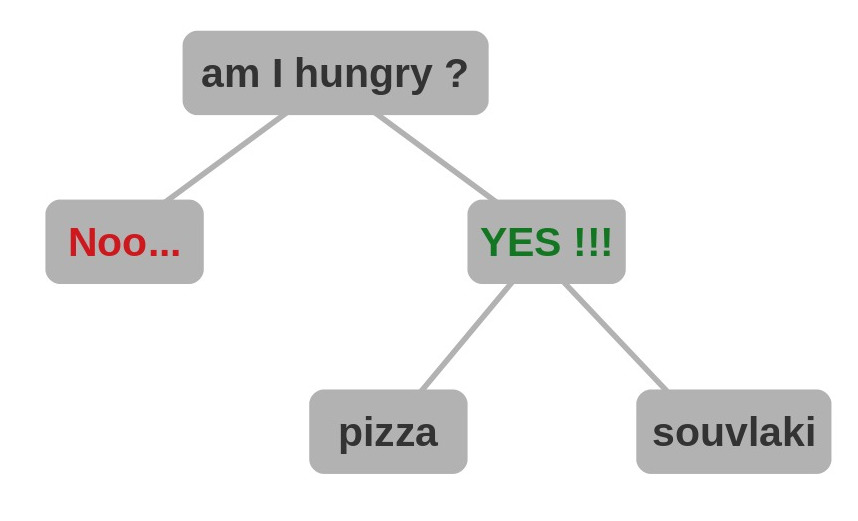
<center>Εικόνα 21.4 Σύντομη αλλά πλήρης εισαγωγή στα Δέντρα Απόφασης, μέσα από ένα καθημερινό παράδειγμα.<center><br>
 

#### Λειτουργία

- Ο αλγόριθμος ξεκινά πρώτα εξερευνώντας ποιο από όλα τα διαθέσιμα χαρακτηριστικά οδηγούν στην καλύτερη διαίρεση των αντικειμένων. 

- Έχοντας καθορίσει το όριο στον ριζικό κόμβο (root node) διαιρεί το αρχικό σετ αντικειμένων δεδομένων σε δύο διαφορετικά σετ (κλαδιά), το καθένα με αντικείμενα κάτω και πάνω από το όριο.  

- Σε καθε ένα από αυτά προχωράει στο να επανεξετάσει όλα τα υπόλοιπα χαρακτηριστικά προσπαθώντας και πάλι να βρει αυτό που διαιρεί βέλτιστα τα δεδομένα. Έτσι δημιουργεί και άλλους κόμβους (nodes) και κλαδιά. 

- Η διαδικασία συνεχίζεται μέχρι να φτάσει στους κόμβους-φύλλα (leaf nodes) που δεν μπορούν να διαιρεθούν περαιτέρω (ή να ενεργοποιηθεί κάποιο κριτήριο σταματήματος).

- Το κάθε φύλλο αντιστοιχεί σε μια κλάση που δίνεται από αυτήν που αντιπροσωπεύει την πλειονότητα των αντικειμένων στο φύλλο. 
    
Αφού εκπαιδευτούν μπορούν να χρησιμοποιηθούν για προβλέψεις. Έχοντας τα χαρακτηριστικά ενός νέου αντικειμένου και τις αποφάσεις σε κάθε κόμβο του δέντρου, μπορούμε να προσανατολιστούμε προς το τελικό αποτέλεσμα. 

#### Κριτήριο επιλογής στους κόμβους

Για να μπορέσει ο αλγόριθμος να βρει το βέλτιστο τρόπο διαίρεσης των αντικειμένων θα πρέπει να χρησιμοποιηθεί μια μετρική που θα ποσοτικοποιεί αυτό το γεγονός. Μια τέτοια μετρική είναι ο **δείκτης μη-καθαρότητας Gini (Gini impurity)**, που υπολογίζει την πιθανότητα ενός αντικειμένου να έχει λάθος ταξινόμηση (κλάση) όταν επιλέγεται τυχαία. Δίνεται από τύπο:

$$ Gini = 1 - \sum\limits_{i=1}^{n} (p_i)^2 $$

όπου $n$ ο αριθμός των κλάσεων και $p_i$ είναι η πιθανότητα ενός αντικειμένου να ανήκει σε μια συγκεκριμένη κλάση με συγκεκριμένες τιμές της μεταβλητής (χαρακτηριστικού) που εξετάζεται.  Οι πιθανότητες αυτές αθροίζονται για όλες τις τιμές του χαρακτηριστικού και για όλες τις κλάσεις που αντιστοιχούν. 

Το Gini impurity για τον κόμβο καθορίζεται από τον μέσο όρο των τιμών αυτών για της κάθε κλάση διαιρεμένες με την συχνότητά τους ([για πιο αναλυτικό υπολογισμό](https://blog.quantinsti.com/gini-index/))


Αν όλα τα αντικείμενα σε ένα σύνολο έχουν την ίδια κλάση τότε το Gini = 0 (πλήρως καθαρό σύνολο). Αν ειναι 1 τότε ο κλάσεις των αντικειμένων είναι τυχαίες.   
    
#### Πλεονεκτήματα

1. Απλά στην κατανόηση και εύκολα ερμηνεύσιμα.
    
2. Μπορούν να οπτικοποιηθούν.
    
3. Χρειάζονται ελάχιστη (αν όχι καθόλου) προεπεξεργασία δεδομένων (πχ μπορούν να δουλέψουν και με μη κανονικοποιημένα δεδομένα).
    
4. Μπορούν να διαχειριστούν προβλήματα με πολλαπλές κλάσεις πρόβλεψης.

5. Μπορούν να διαχειριστούν μεγάλα σετ δεδομένων.
    
#### Μειονεκτήματα    
    
1. Μπορούν εύκολα να οδηγηθούν σε υπερπροσαρμογή.

2. Μικρές αλλαγές στα δεδομένα μπορεί να οδηγήσουν σε διαφορετικά δέντρα.

3. Αν οι κλάσεις του δείγματος δεν είναι ισορροπημένες τότε τα δέντρα εύκολα κλίνουν στο να προβλέπουν την κυρίαρχη κλάση. (Για αυτό απαιτείται να εξισορροπείται το αρχικό δείγμα.) 

#### Υλοποίηση 

Για να χρησιμοποιήσουμε Δέντρα Απόφασης θα πρέπει να καλέσουμε τον αλγόριθμο `DecisionTreeClassifier()` από το module `sklearn.tree` ([περισσότερα](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)). 

_Σημείωση: δείτε την αντιστοιχία των εντολών με αυτές που χρησιμοποιήσαμε στην ομαδοποίηση._

In [14]:
from sklearn.tree import DecisionTreeClassifier

# load model
clf = DecisionTreeClassifier()
# fit model with the specific data AND their labels
clf = clf.fit(X_train, y_train)

Μπορούμε και να οπτικοποιήσουμε το δέντρο!

[Text(0.43478260869565216, 0.95, 'x[1] <= 10.674\ngini = 0.442\nsamples = 641\nvalue = [430, 211]'),
 Text(0.34782608695652173, 0.85, 'x[0] <= 10.972\ngini = 0.117\nsamples = 225\nvalue = [14, 211]'),
 Text(0.17391304347826086, 0.75, 'x[1] <= 9.401\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.08695652173913043, 0.65, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.2608695652173913, 0.65, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.5217391304347826, 0.75, 'x[2] <= 5.968\ngini = 0.046\nsamples = 211\nvalue = [5, 206]'),
 Text(0.43478260869565216, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6086956521739131, 0.65, 'x[2] <= 9.752\ngini = 0.037\nsamples = 210\nvalue = [4, 206]'),
 Text(0.391304347826087, 0.55, 'x[0] <= 11.174\ngini = 0.029\nsamples = 207\nvalue = [3, 204]'),
 Text(0.21739130434782608, 0.45, 'x[0] <= 11.115\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.13043478260869565, 0.35, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.304

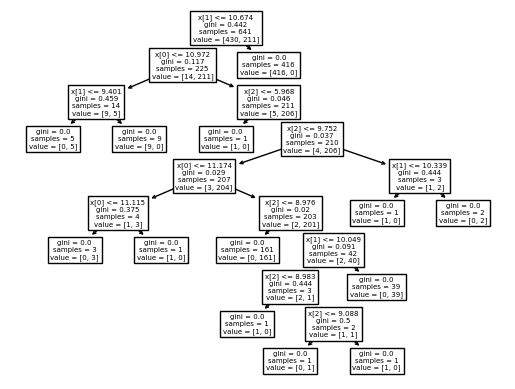

In [15]:
from sklearn.tree import plot_tree

# Visualize the tree
plot_tree(clf)


Ας χρησιμοποιήσουμε το δέντρο αυτό για προβλέψεις. Θα χρησιμοποιήσουμε το σετ δοκιμής (που δεν χρησιμοποιήσαμε στην εκπαίδευση) για το οποίο έχουμε ετικέτες. Έτσι μπορούμε να συγκρίνουμε τα αποτελέσματά μας (προβλέψεις με πραγματικές ετικέτες). 

In [16]:
from sklearn import metrics 

# predicting the test samples
y_pred = clf.predict(X_test)

print(f"Classification report:\n\n {metrics.classification_report(y_test, y_pred)}") 
print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, y_pred)}")


Classification report:

               precision    recall  f1-score   support

         CON       0.98      0.97      0.98       195
         SEL       0.94      0.96      0.95        80

    accuracy                           0.97       275
   macro avg       0.96      0.97      0.96       275
weighted avg       0.97      0.97      0.97       275

Confusion matrix: 

 [[190   5]
 [  3  77]]


ωωωωπ...και _τι είναι όλα αυτά;_ 

### 21.4.2 Μετρικές αξιολόγησης μοντέλου

#### πίνακας σύγχησης

Υπάρχει μια σειρά από μετρικές αξιολόγησης για την απόδοση ενός μοντέλου. Ξεκινάμε με την εισαγωγή της έννοιας του **πίνακα σύγχυσης (confusion matrix)**.

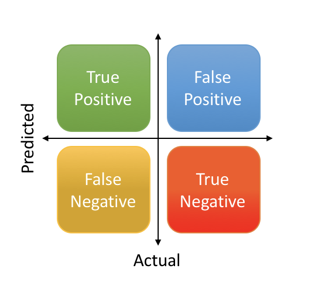

<center> Εικόνα 21.5 Πίνακας σύγχησης για ταξινόμηση. (Πηγή: <a href="https://towardsdatascience.com/precision-vs-recall-386cf9f89488"  target="_blank" rel="noopener noreferrer">Precision vs Recall by Shruti Saxena</a>)</center>

Εξήγηση των όρων (για ένα δυαδικό πρόβλημα, όπως στην περίπτωσή μας που έχουμε 'SEL' και 'CON'):
    
- True Positive: περιπτώσεις που ο αλγόριθμος προβλέπει σωστά την κλάση που μας ενδιαφέρει ('SEL') για ένα αντικείμενο και η πραγματική του είναι όντως αυτή. 

- False Positive: περιπτώσεις που προβλέπει την κλάση αλλά στην πραγματικότητα δεν είναι.

- True Negative: περιπτώσεις που προβλέπει σωστά την αρνητική κλάση ('CON') που ταυτίζεται με την πραγματική.

- False Negative: περιπτώσεις που προβλέπει την αρνητική κλάση ('CON') αλλά η πραγματική είναι η άλλη ('SEL').

#### μερικές μετρικές ακόμα

- Ακρίβεια, ο αριθμός των σωστών προβλέψεων: 
$$ \rm{Precision} =  \frac{\rm{True~Positives}}{\rm{Actual~Results}} = \frac{\rm{True~ Positives}}{\rm{True~Positives\,+\,False~Positives}} $$ <br>

- Ανάκληση, ο αριθμός των πραγαμτικών δειγμάτων που προβλέπονται σωστά: 
$$ \rm{Recall} = \frac{\rm{True~Positives}}{\rm{Predicted~Results}} = \frac{\rm{True~ Positives}}{\rm{True~Positives + False~Negatives}} $$ <br>

- Βαθμολογία F1, ο αρμονικός μέσος της ακρίβειας και την ανάκλησης (για ισορροπία):
$$ \rm{F1-score} = 2 \times \frac{\rm{Precision}\times\rm{Recall}}{\rm{Precision}+\rm{Recall}}$$ <br>

- Συνολική ακρίβεια, το ποσοστό των συνολικών σωστών προβλέψεων επί του συνόλου των δειγμάτων: 
$$ \rm{Accuracy} = \frac{\rm{True~Positives}\,+\,\rm{True~Negatives}}{\rm{Total}} $$ <br>

- Μακρο-μέσος όρος (macro avg), ο μέσος όρος των μετρικών για όλες τις κατηγορίες, δίνοντας το ίδιο βάρος σε κάθε κατηγορία (ανεξαρτήτως του πόσα δείγματα έχει).<br><br>

- Σταθμισμένος μέσος όρος (weighted avg): Ο μέσος όρος των μετρικών, λαμβάνοντας υπόψη το πλήθος των δειγμάτων κάθε κατηγορίας (δηλαδή, δίνει μεγαλύτερη βαρύτητα στις κατηγορίες με περισσότερα δείγματα).<br><br>

- Πλήθος (support), είναι ο αριθμός των αντικειμένων ανά κλάση στο σετ δοκιμής.<br>


#### ποια χρησιμοποιούμε;

Ποια μετρική θα πρέπει να μεγιστοποιήσουμε για να βελτιστοποιήσουμε το μοντέλο μας; 

Εξαρτάται από τον **στόχο του μοντέλου** και την φύση του προβλήματος. 

_Παράδειγμα 1:_ Θέλουμε να παρατηρήσουμε τα πηγές βαρυτικών κυμάτων (ΒΚ), χωρίς να χάσουμε χρόνο σε άσχετους / λανθασμένους στόχους. Το πρόβλημα ανάγεται σε:

- TP: ανιχνεύτηκε σαν πηγη ΒΚ, και είναι πηγή ΒΚ
- FP: ανιχνεύτηκε σαν πηγη ΒΚ, αλλά δεν είναι 
- TN: δεν ανιχνεύτηκε σαν πηγή ΒΚ, και δεν είναι 
- FN: δεν ανιχνεύτηκε σαν πηγή ΒΚ, αλλά είναι 
 
<details>
<summary>Ποια μετρική είναι πιο σημαντική;  (click!) </summary>
Το να παρατηρήσουμε πηγές Βαρυτικών Κυμάτων που είναι σπάνιες σημαίνει ότι δεν πρέπει να χάσουμε χρόνο σε αμφισβητούμενες περιπτώσεις. Άρα θα πρέπει να κυνηγήσουμε τα πιο σίγουρα, οπότε θα πρέπει ελαχιστοποιήσουμε τα FP, και να <b>μεγιστοποιήσουμε το Precision</b>.
</details>

_Παράδειγμα 2:_ Θέλουμε να δημιουργήσουμε ένα κατάλογο με άστρα ΟΒ, οπότε και θέλουμε να μπορούμε να ανακτήσουμε όλο τον πληθυσμό τους.

- TP: ανιχνεύτηκε σαν ΟΒ, και είναι ΟΒ
- FP: ανιχνεύτηκε σαν ΟΒ, αλλά δεν είναι ΟΒ
- TN: δεν ανιχνεύτηκε σαν ΟΒ, και δεν είναι ΟΒ
- FN: δεν ανιχνεύτηκε σαν ΟΒ, αλλά είνα  ΟΒ
    
<details>
<summary>Ποια μετρική είναι πιο σημαντική;  (click!)  </summary>
Σε αυτή την περίπτωση θέλουμε ένα πλήρη κατάλογο, οπότε δεν θα πρέπει να χάσουμε καμία πηγή από τον πληθυσμό των ΟΒ άστρων - ακόμα και αν αυτό σημαίνει να έχουμε παραπάνω FP. Επομένως θα πρέπει να ελαχιστοποιήσυμε το FN, και να <b>μεγιστοποιήσουμε το Recall</b>.

</details>

Μια ενδιαφέρουσα παρουσίαση για το συγκεκριμένο θέμα μπορεί να βρεθεί [εδώ](https://towardsdatascience.com/precision-and-recall-a-comprehensive-guide-with-practical-examples-71d614e3fc43). 


Ας επιστρέψουμε τώρα στο παράδειγμά μας. Μπορούμε να επαναλάβουμε το διάγραμμα του πίνακα σύγχησης αλλά με μια πιο όμορφή αναπαράσταση (χρησιμοποιώντας την ακόλουθη συνάρτηση). 

In [17]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
                  
                  
    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, alpha=0.5)
#    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('# sources', fontsize=16)
    cbar.ax.tick_params(labelsize=16) # (fontsize=15)
   

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45, fontsize=15)
        plt.yticks(tick_marks, target_names, fontsize=15)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center", color="black", fontsize=14 )
                     #color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center", color="black") 
#                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predicted label (accuracy={:0.2f})'.format(accuracy, misclass), fontsize=16)
    plt.show()


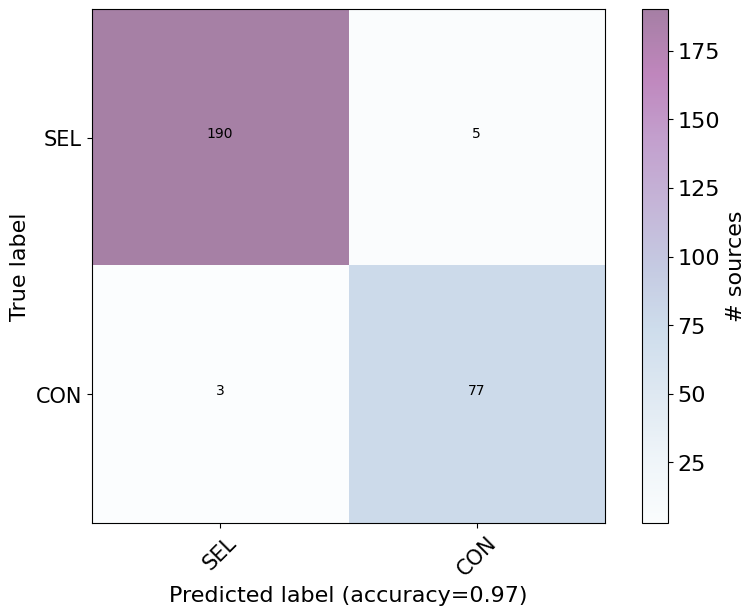

In [18]:
plot_confusion_matrix( metrics.confusion_matrix( y_test, y_pred),
                      ['SEL','CON'],
                      title='Confusion matrix', cmap='BuPu', # for more options see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                      normalize=False  # True returns fraction, False raw numbers
                      ) # YlOrBr



<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 21.4</b>

Συγκεντρώστε όλες τις εντολές από τα παραπάνω κελιά έτσι ώστε να μπορείτε να κάνετε:
    
- την επιλογή της κλάσης ή των κλάσεων που θέλετε να κρατήσετε, 
- να διαβάσετε τα δεδομένα, 
- να τα χωρίσετε στα σετ εκπαίδευσης και δοκιμής
- να εκπαιδεύσετε το μοντέλο με το σετ εκπαίδευσης 
- να κάνετε τις προβλέψεις για το σετ δοκιμής
- να φτιάξετε τον πίνακα σύγχησης.
    
Αλλάξτε την κλάση που εξετάζετε (μπορείτε να προσθέσετε αν θέλετε και άλλες - όλες μαζί θα αποτελούν την κλάση 'SEL' που θέλετε να διαχωρίσετε από όλα τα υπόλοιπα δεδομένα), όπως και τα φίλτρα που χρησιμοποιείτε. 
    
Τι παρατηρείτε αν αρχίσετε να αυξάνετε τον αριθμό των κάσεων που συμπεριλάμβάνετε στην 'SEL';
    
Τι συμβαίνε αν αλλάξετε τα φίλτρα ή προσθέσετε μερικά ακόμα;    

In [19]:
# You can try it here

In [20]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


# stars with mags in: J,45
Type    initial    final 
-------------------------
OBA         370      350
OBAe         73       69
RSG         297      292
WR           91       83
YSG         208      208
------------------------
TOTAL:     1039     1002
classifying:         850
contaminants:        152

>Splitting dataset
- From 1002 sources:
   701 (training)
   301 (test)


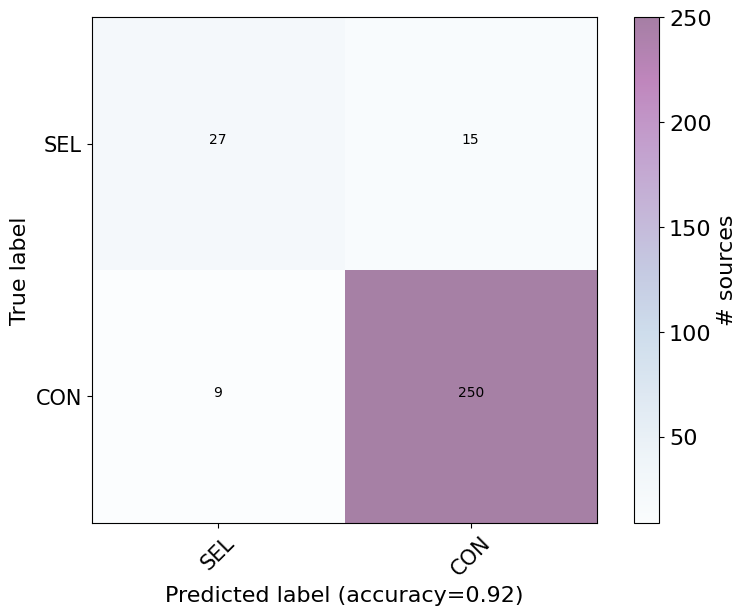

In [21]:
class2keep = ['RSG', 'YSG', 'OBA']
# Select the bands you want to use here:
bands_selected = ['J', '45']

ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected, class2keep)  

X_train, X_test, y_train, y_test = train_test_split(ml_data_mags, ml_labels, 
                        test_size=0.3) #, random_state=42) 

print()
print('>Splitting dataset')
print(f'- From {len(ml_objects)} sources:')
print(f'   {len(X_train)} (training)')
print(f'   {len(X_test)} (test)')

# load model
clf = DecisionTreeClassifier()
# fit model with the specific data AND their labels
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plot_confusion_matrix( metrics.confusion_matrix( y_test, y_pred),
                      ['SEL','CON'],
                      title='Confusion matrix', cmap='BuPu', # for more options see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                      normalize=False  # True returns fraction, False raw numbers
                      ) # YlOrBr

### 21.4.3 Τυχαία Δάση

#### Λειτουργία

Τα Τυχαία Δάση (Random Forests, [Breiman (2001), Machine Learning, 45, 5](https://doi.org/10.1023/A:1010933404324)) αποτελούν μια γενίκευση των Δέντρων Απόφασης. Δημιουργούν ένα μεγάλο αριθμό από Δέντρα ΑΠόφασης μέσω της τυχαίας επιλογής ενός υποσυνόλου αντικειμένων του συνολικού δείγματος, καθώς και της τυχαίας επιλογής χαρακτηριστικών. Αυτή η τυχαιότητα μειώνει τη συσχέτιση μεταξύ των διαφορετικών (ατομικών) δέντρων. Καθώς το κάθε δέντρο έχει διαφορετική αρχικοποίηση, διαφορετικές συνθήκες στους κόμβους του και διαφορετική συνολική δομή, αυτή η ποικιλία οδηγεί σε συνολικά αξιόπιστες προβλέψεις.

Αναλογικά με τα Δέντρα Απόφασης το Τυχαίο Δάσος μπορεί να χρησιμοποιηθεί για προβέψεις και για ταξινόμηση. Όταν έχουμε ένα καινούργιο αντικείμενο τότε τα δεδομένα του περνάνε μέσα από το κάθε ένα ξεχωριστό δέντρο. Ανάλογα με τα χαρακτηριστικά του και τις αποφάσεις στους κόμβους του κάθε δέντρου, το καθένα από αυτά δίνει μια κλάση. Το τελικό αποτέλεσμα/κλάση προκύπτει από την πλειοψηφία όλων αυτών.

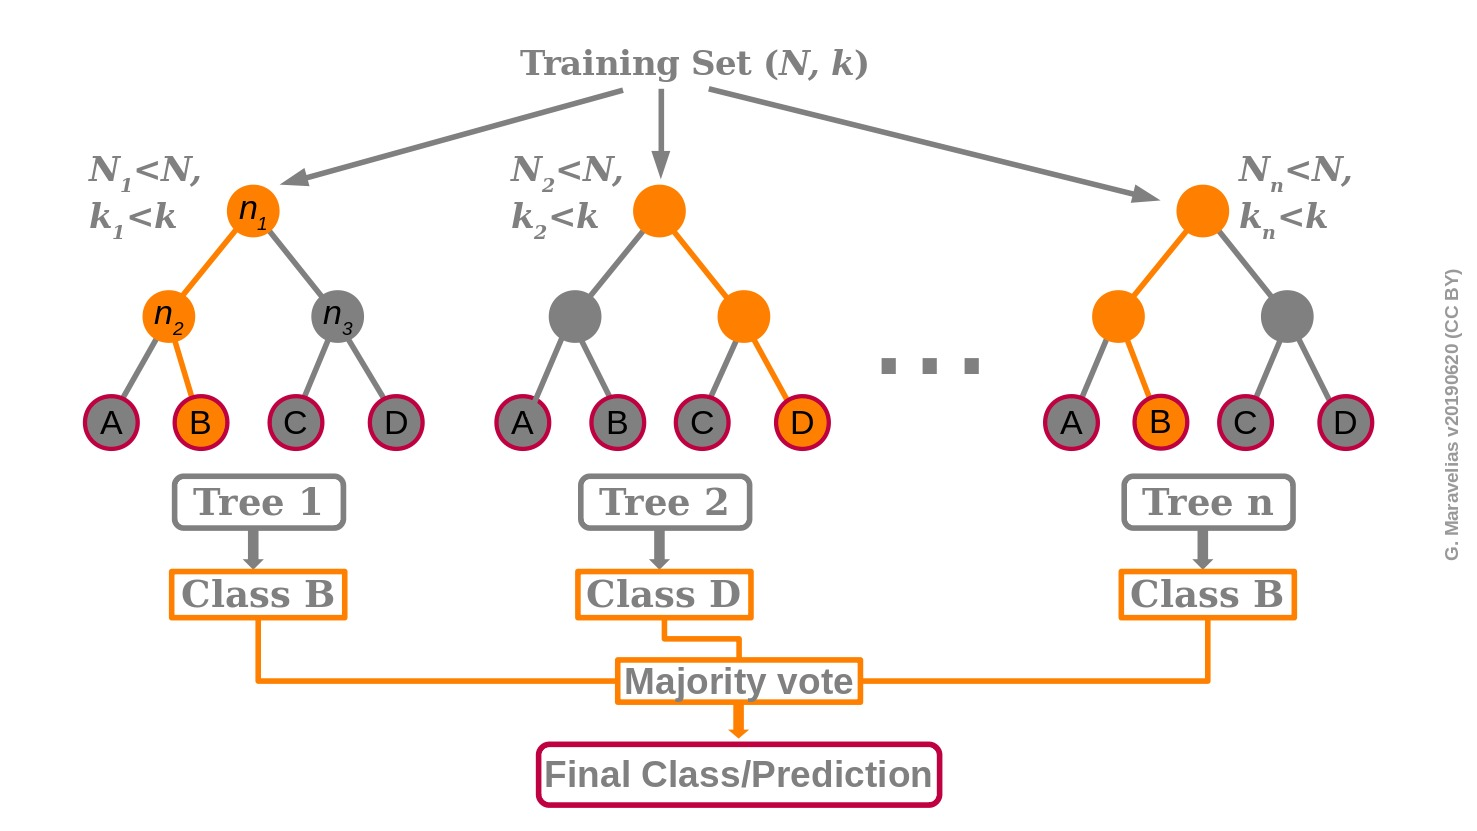
<center>Εικόνα 21.6 Σχηματική απεικόνιση ενός ταξινομητή Τυχαίου Δάσους.</center>

Το γεγονός ότι τα RF συνδυάζουν την πρόβλεψη από έναν αριθμό ατομικών δέντρων τα καθιστά **μέθοδο συνόλου (ensemble)**.

Το άρθρο των [Reis, Baron, & Shahaf (2019)]( [Reis, Baron, & Shahaf (2019), AJ, 157, 16](https://ui.adsabs.harvard.edu/abs/2019ascl.soft03009R/abstract) provide) παρέχει μια εξαιρετική περιγραφή (για ένα πρόβλημα δύο κλάσεων) και παρουσιάζει μια μέθοδο Τυχαίου Δάσους που λαμβάνει υπόψη τις αβεβαιότητες στα δεδομένα και τις ετικέτες τους.

    
#### Πλεονεκτήματα

1. Χρειάζονται ελάχιστη (αν όχι καθόλου) προεπεξεργασία δεδομένων (πχ μπορούν να δουλέψουν και με μη κανονικοποιημένα δεδομένα).

2. Εμπεριέχουν μια διαδικασία επιλογής των καταλληλότερων χαρακτηριστικών (λόγω της τυχαιότητας επιλογής τους κατά την διάρκεια κατασκευής των ατομικών δέντρων).
    
3. Μπορούν να διαχειριστούν προβλήματα με πολλαπλές κλάσεις πρόβλεψης.

4. Μπορούν να διαχειριστούν μεγάλα σετ δεδομένων.

5. Είναι πιο ανθεκτικά σε μεταβολές των δεδομένων και λιγότερο πιθανά να οδηγήσουν σε υπερπροσαρμογή.

6. Αυξάνουν της ακρίβεια των προβλέψεων, ενώ έχουν βελτιωμένη απόδοση σε μη ισορροπημένα δείγματα (όχι όμως σε ακραίες περιπτώσεις).
    
#### Μειονεκτήματα    
    
1. Σε αντίθεση με τα Δέντρα Απόφασης δεν είναι εύκολα ερμηνεύσιμα.

2. Είναι πιθανό να οδηγήσουν σε υπερπροσαρμογή, ιδιαίτερα όταν επιλέγεται ένας μεγάλος αριθμός δέντρων και το δείγμα είναι μικρό. 

3. Για να βελτιστοποιηθούν οι υπερπαράμετροι χρειάζεται πειραματισμός και υπολογιστικός χρόνος, που γίνεται πιο σημαντικός καθώς μεγαλώνει το σετ δεδομένων.

#### Υλοποίηση

Για να χρησιμοποιήσουμε τα Τυχαία Δάση θα πρέπει να καλέσουμε τον αλγόριθμο `RandomForestClassifier()` από το module `sklearn.ensemble` ([περισσότερα](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)). 

Θα ακολουθήσουμε τα βήματα που είδαμε και πριν για τα Δέντρα Απόφασης.

In [22]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


Σε αυτή (την πρώτη προσέγγιση) θα χρησιμοποιήσουμε την δυαδική προσέγγιση, δηλαδή να ξεχωρίσουμε μία κλάση (ή περισσότερες) από όλες τις υπόλοιπες. 

In [23]:
# add any class if you want to use RF as binary classifier, 
class2keep_RF=['RSG']  
# select features to use
bands_selected_RF = ['V', 'J', 'K','36']  

In [24]:
ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected_RF, class2keep_RF)

print()
print('>Splitting dataset')
X_train, X_test, y_train, y_test = train_test_split(ml_data_mags, ml_labels, 
                        test_size=0.3) #, random_state=42) 

print(f'- From {len(ml_objects)} sources:')
print(f'   {len(X_train)} (training)')
print(f'   {len(X_test)} (test)')


# stars with mags in: V,J,K,36
Type    initial    final 
-------------------------
OBA         370      277
OBAe         73       62
RSG         297      292
WR           91       74
YSG         208      208
------------------------
TOTAL:     1039      913
classifying:         292
contaminants:        621

>Splitting dataset
- From 913 sources:
   639 (training)
   274 (test)


Classification report:

               precision    recall  f1-score   support

         CON       0.97      0.99      0.98       186
         SEL       0.98      0.93      0.95        88

    accuracy                           0.97       274
   macro avg       0.97      0.96      0.97       274
weighted avg       0.97      0.97      0.97       274

Confusion matrix: 

 [[184   2]
 [  6  82]]


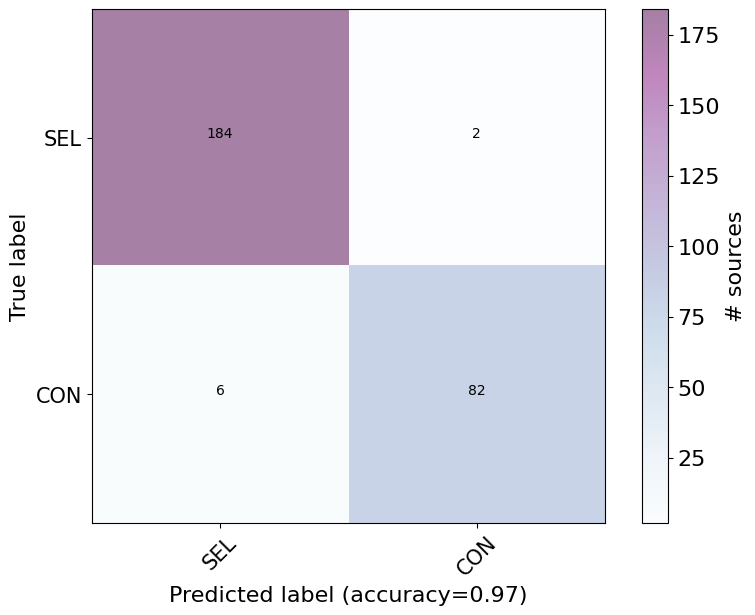

In [25]:
from sklearn.ensemble import RandomForestClassifier

# load model
clfrf = RandomForestClassifier()
# train model on the training data
clfrf.fit(X_train, y_train)
# predict labels for the test sample
y_pred = clfrf.predict(X_test)

# compare results
print(f"Classification report:\n\n {metrics.classification_report(y_test, y_pred)}") 
print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, y_pred)}")

plot_confusion_matrix( metrics.confusion_matrix( y_test, y_pred),
                      ['SEL','CON'],
                      title='Confusion matrix', cmap='BuPu', # for more options see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                      normalize=False  # True returns percent, False raw numbers
                      ) # YlOrBr

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 21.5</b>

Δοκιμάστε την υλοποίηση των Τυχαίων Δασών με την επιλογή κλάσης/κλάσεων και φίλτρων που χρησιμοποιήσατε στην προηγούμενη άσκηση. Τι παρατηρείτε;
   

In [26]:
# You can try it here

# stars with mags in: V,J,K,36
Type    initial    final 
-------------------------
OBA         370      277
OBAe         73       62
RSG         297      292
WR           91       74
YSG         208      208
------------------------
TOTAL:     1039      913
classifying:         292
contaminants:        621

>Splitting dataset
- From 913 sources:
   639 (training)
   274 (test)
Classification report:

               precision    recall  f1-score   support

         CON       0.98      0.97      0.98       188
         SEL       0.93      0.97      0.95        86

    accuracy                           0.97       274
   macro avg       0.96      0.97      0.96       274
weighted avg       0.97      0.97      0.97       274

Confusion matrix: 

 [[182   6]
 [  3  83]]


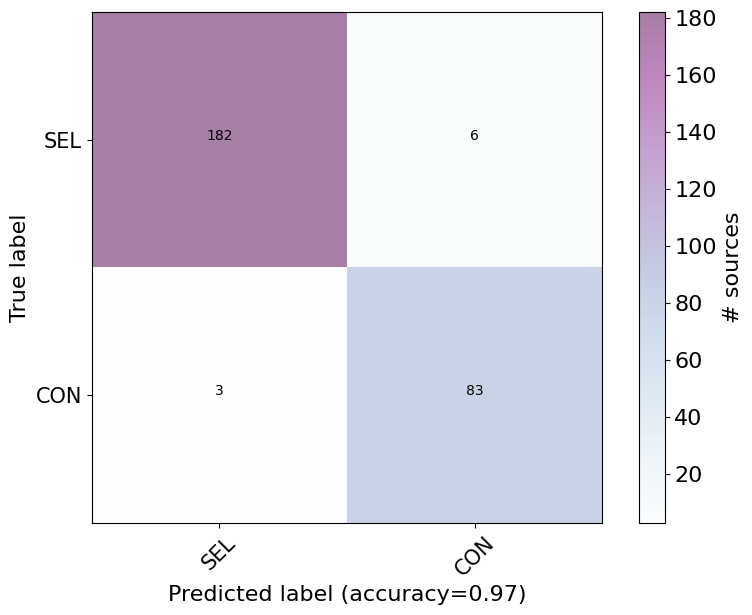

In [27]:
class2keep = ['RSG', 'YSG', 'OBA']
# Select the bands you want to use here:
bands_selected = ['J', '45'] 

ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected_RF, class2keep_RF)

print()
print('>Splitting dataset')
X_train, X_test, y_train, y_test = train_test_split(ml_data_mags, ml_labels, 
                        test_size=0.3) #, random_state=42) 

print(f'- From {len(ml_objects)} sources:')
print(f'   {len(X_train)} (training)')
print(f'   {len(X_test)} (test)')

# load model
clfrf = RandomForestClassifier()
# train model on the training data
clfrf.fit(X_train, y_train)
# predict labels for the test sample
y_pred = clfrf.predict(X_test)

# compare results
print(f"Classification report:\n\n {metrics.classification_report(y_test, y_pred)}") 
print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, y_pred)}")

plot_confusion_matrix( metrics.confusion_matrix( y_test, y_pred),
                      ['SEL','CON'],
                      title='Confusion matrix', cmap='BuPu', # for more options see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                      normalize=False  # True returns percent, False raw numbers
                      ) # YlOrBr

##### Απάντηση

Με τα Τυχαία Δάση έχουμε μια (σημαντική ανάλογα με τις επιλογές) βελτίωση της απόδοσης από ότι ένα απλό Δέντρο Απόφασης. 

## 21.5 Ταξινομώντας περισσότερες κλάσεις

Και οι δύο μέθοδοι που είδαμε προηγούμενως μπορούν να εκπαιδευτούν ώστε να προβλέπουν όλες τις κλάσεις ενός προβήματος. Ας δούμε πως υλοποιείται αυτό για τα Τυχαία Δέντρα.

In [28]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


Επιλέγουμε την κενή λίστα αυτή τη φορά.

In [29]:
# add any class if you want to use RF as binary classifier, 
# else use an empty list to consider all classes []
class2keep_RF=[]  
# select features to use
bands_selected_RF = ['V', 'J', 'K','36']  

ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected_RF,[])  

# stars with mags in: V,J,K,36
Type    initial    final 
-------------------------
OBA         370      277
OBAe         73       62
RSG         297      292
WR           91       74
YSG         208      208
------------------------
TOTAL:     1039      913


Παρατηρούμε τώρα ότι παρουσιάζονται όλες οι κλάσεις με τα αντίστοιχα νούμερα (αρχικά και τελικά μετά την επιλογή αυτών των αντικειμένων που έχουν μετρήσεις στα επιλεγμένα φίλτρα). 

Οπότε ας δούμε πως τυπώνονται οι ετικέτες τώρα.


In [30]:
print(ml_labels)

['OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'O

#### Διαμοιρασμός με πολλές κλάσεις


In [31]:
indices = np.arange(len(ml_labels))

X_train, X_test, y_train, y_test = train_test_split(ml_data_mags, ml_labels, 
                        test_size=0.3) #, random_state=42) 

print(f'> From {len(ml_objects)} sources we use {len(X_train)} for training and {len(X_test)} for testing.') 

print('\nStatistics per class:')
k = 0
for c in unique_cls:
    items_train = np.where( y_train==c )[0]
    items_test  = np.where( y_test==c )[0]
    items_total = np.where( ml_labels==c )[0]
    print(f'> For {c} there are {len(items_total)} sources split in {len(items_train)} (train) and {len(items_test)} (test) samples')


> From 913 sources we use 639 for training and 274 for testing.

Statistics per class:
> For OBA there are 277 sources split in 202 (train) and 75 (test) samples
> For OBAe there are 62 sources split in 46 (train) and 16 (test) samples
> For RSG there are 292 sources split in 198 (train) and 94 (test) samples
> For WR there are 74 sources split in 54 (train) and 20 (test) samples
> For YSG there are 208 sources split in 139 (train) and 69 (test) samples


Εδώ βλέπουμε ότι ο διαμοιρασμός των αντικειμένων στα δύο σετ περιλαμβάνει αντικείμενα από όλες τις κλάσεις - όπως και θα έπρεπε για να υπάρχει πληροφορία για την εκπαίδευση πάντα και να δοκιμάζεται πάντα σε κάποια αντικείμενα που δεν έχει δει ο αλγόριθμος.

Ωστόσο, ανάλογα με το μέγεθος του δείγματος και το πόσο σοβαρό είναι το θέμα του μη ισορροπημένου δείγματος, είναι πιθανό να χωριστεί το όλο δείγμα με τέτοιο τρόπο ώστε το τελικό σετ δοκιμής να μην περιέχει αντικείμενα μια κλάσης (π.χ. δοκιμάστε στο παραπάνω παράδειγμα ένα ποσοστό 0.002). Για να είμαστε σίγουροι πάντα ότι υπάρχουν αντικείμενα από κάθε κλάση στο σετ δοκιμής πρέπει να επιλέξουμε το `stratify`, που διατηρεί το ίδιο ποσοστό αντικειμένων ανα κλάση σε σχέση με το αρχικό δείγμα σε όλα τα σετ (εκπαίδευσης, δοκιμής). Για να καταλάβει ο αλγόριθμος τις αναλογίες θα πρέπει να του δώσουμε μια λίστα με τις ετικέτες. Ενεργοποιώντας και το `shuffle` βοηθάει στην καλύτερο διαμοιρασμό.


In [32]:
indices = np.arange(len(ml_labels))

X_train, X_test, y_train, y_test = train_test_split(ml_data_mags, ml_labels,
                          shuffle=True, stratify=ml_labels, 
                          test_size=0.3) #, random_state=42) 

print(f'> From {len(ml_objects)} sources we use {len(X_train)} for training and {len(X_test)} for testing.') 

print('\nStatistics per class:')
k = 0
for c in unique_cls:
    items_train = np.where( y_train==c )[0]
    items_test  = np.where( y_test==c )[0]
    items_total = np.where( ml_labels==c )[0]
    print(f'> For {c} there are {len(items_total)} sources split in {len(items_train)} (train) and {len(items_test)} (test) samples')


> From 913 sources we use 639 for training and 274 for testing.

Statistics per class:
> For OBA there are 277 sources split in 194 (train) and 83 (test) samples
> For OBAe there are 62 sources split in 43 (train) and 19 (test) samples
> For RSG there are 292 sources split in 204 (train) and 88 (test) samples
> For WR there are 74 sources split in 52 (train) and 22 (test) samples
> For YSG there are 208 sources split in 146 (train) and 62 (test) samples


Ακολουθεί η ίδια διαδικασία με πριν.

Classification report:

               precision    recall  f1-score   support

         OBA       0.79      0.76      0.77        83
        OBAe       0.50      0.37      0.42        19
         RSG       0.96      1.00      0.98        88
          WR       0.64      0.64      0.64        22
         YSG       0.83      0.89      0.86        62

    accuracy                           0.83       274
   macro avg       0.74      0.73      0.73       274
weighted avg       0.82      0.83      0.82       274

Confusion matrix: 

 [[63  6  1  4  9]
 [ 6  7  2  4  0]
 [ 0  0 88  0  0]
 [ 5  1  0 14  2]
 [ 6  0  1  0 55]]


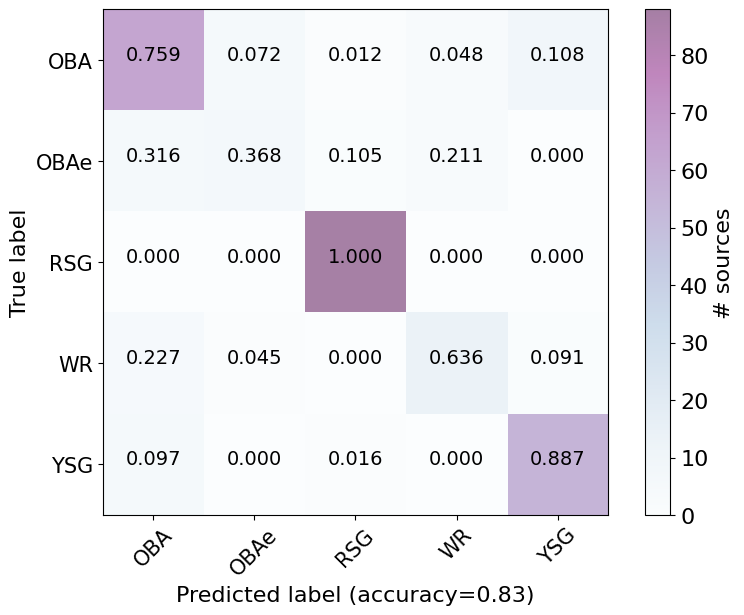

In [33]:
# load model
clfrf = RandomForestClassifier()
# train model on the training data
clfrf.fit(X_train, y_train)
# predict labels for the test sample
y_pred = clfrf.predict(X_test)

# compare results
print(f"Classification report:\n\n {metrics.classification_report(y_test, y_pred)}") 
print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, y_pred)}")

plot_confusion_matrix( metrics.confusion_matrix( y_test, y_pred),
                      unique_cls,
                      title='Confusion matrix', cmap='BuPu', # for more options see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                      normalize=True  # True returns percent, False raw numbers
                      ) # YlOrBr

_Σημείωση: τα αποτελέσματα παρουσιάζονται τώρα σαν ποσοστά (δείτε στην `plot_confusion_matrix('normalize=True')`, για να είναι πιο εύκολη η σύγκρισή τους_

- Ο πίνακας σύγχησης τώρα είναι πιο πολύπλοκος καθώς συμπεριλαμβάνει όλες τις κλάσεις.

- Η (συνολική) ακρίβεια των προβλέψεων πέφτει καθώς έχουμε περισσότερες κλάσεις και άρα μεγαλύτερη αλληλοεπικάλυψη στον χώρο των χαρακτηριστικών, που σημαίνει ότι είναι πιο δύσκολο για τον αλγόριθμο να τις ξεχωρίσει. 

- Παρατηρούμε ότι η απόδοση του αλγορίθμου αλλάζει ανάλογα με την κλάση (π.χ. εξαιρετικό αποτέλεσμα για τα RSG, αλλά όχι και για OBA).

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 21.6</b>

Δοκιμάστε να επαναλάβετε την προηγούμενη ταξινόμηση (για όλες τις κλάσεις) αλλάζοντας μόνο τα φίλτρα και τον αριθμό τους και διερευνήστε ποια επιλογή λειτουργεί καλύτερα. 
   

In [34]:
# You can try it here

In [35]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


# stars with mags in: B,I,J,H,K,36,45
Type    initial    final 
-------------------------
OBA         370      251
OBAe         73       60
RSG         297      279
WR           91       70
YSG         208      178
------------------------
TOTAL:     1039      838
> From 838 sources we use 586 for training and 252 for testing.

Statistics per class:
> For OBA there are 251 sources split in 176 (train) and 75 (test) samples
> For OBAe there are 60 sources split in 42 (train) and 18 (test) samples
> For RSG there are 279 sources split in 195 (train) and 84 (test) samples
> For WR there are 70 sources split in 49 (train) and 21 (test) samples
> For YSG there are 178 sources split in 124 (train) and 54 (test) samples
Classification report:

               precision    recall  f1-score   support

         OBA       0.92      0.91      0.91        75
        OBAe       0.67      0.67      0.67        18
         RSG       1.00      0.99      0.99        84
          WR       0.74      0.67  

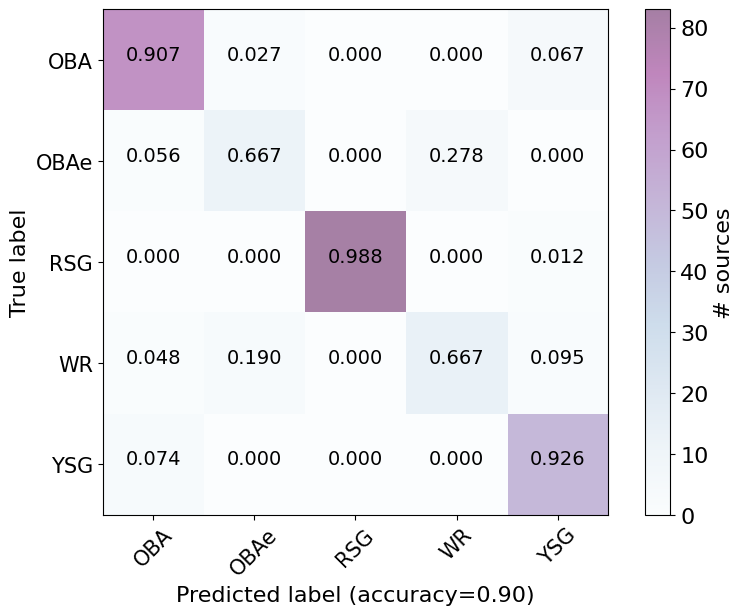

In [36]:
# add any class if you want to use RF as binary classifier, 
# else use an empty list to consider all classes []
class2keep_RF=[]  
# select features to use
bands_selected_RF = ['B', 'I', 'J', 'H', 'K','36', '45']  

ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected_RF,[]) 

indices = np.arange(len(ml_labels))

X_train, X_test, y_train, y_test = train_test_split(ml_data_mags, ml_labels,
                          shuffle=True, stratify=ml_labels, 
                          test_size=0.3) #, random_state=42) 

print(f'> From {len(ml_objects)} sources we use {len(X_train)} for training and {len(X_test)} for testing.') 

print('\nStatistics per class:')
k = 0
for c in unique_cls:
    items_train = np.where( y_train==c )[0]
    items_test  = np.where( y_test==c )[0]
    items_total = np.where( ml_labels==c )[0]
    print(f'> For {c} there are {len(items_total)} sources split in {len(items_train)} (train) and {len(items_test)} (test) samples')
 
 # load model
clfrf = RandomForestClassifier()
# train model on the training data
clfrf.fit(X_train, y_train)
# predict labels for the test sample
y_pred = clfrf.predict(X_test)

# compare results
print(f"Classification report:\n\n {metrics.classification_report(y_test, y_pred)}") 
print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, y_pred)}")

plot_confusion_matrix( metrics.confusion_matrix( y_test, y_pred),
                      unique_cls,
                      title='Confusion matrix', cmap='BuPu', # for more options see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                      normalize=True  # True returns percent, False raw numbers
                      ) # YlOrBr

## 21.6 Ανακεφαλαίωση - πως χτίζουμε ένα μοντέλο ταξινόμησης

> <font size=3>1. Εξετάζουμε / οπτικοποιούμε / προεπεξεργαζόμαστε τα δεδομένα </font>
> 
> <font size=3>2. Επιλέγουμε χαρακτηριστικά</font>
>    
> <font size=3>3. Επιλέγουμε αλγόριθμο</font>
>    
> <font size=3>4. Διαχωρίζουμε δεδομένα και ακολουθούμε τον  Χρυσό Κανόνα</font>
>    
> <font size=3>5. Επιλέγουμε μετρικές</font>
>    
> <font size=3>6. Εξετάζουμε τα αποτελέσματα και επαναλαμβάνουμε</font>

In [ ]:
# EOF